In [1]:
import pandas as pd
import os
from pathlib import Path
import shutil
import random
import math

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image as imager

import gradio as gr
from PIL import Image as im



In [4]:
FILE_PATH = Path('chestxray/metadata.csv').absolute()
IMAGE_PATH = Path('chestxray/images/').absolute()

In [5]:
df = pd.read_csv(FILE_PATH)

In [6]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [7]:
TARGET_DIR = Path('./Dateset/Covid').absolute()
if not os.path.exists(TARGET_DIR):
    os.makedirs(TARGET_DIR)
    print("Covid Folder Created")

In [8]:
cnt = 0

for (i, row) in df.iterrows():
    if 'COVID-19' in row['finding'] and row['view'] == 'PA':
        filename = row["filename"]
        image_path = IMAGE_PATH / filename
        target_copy_path = TARGET_DIR / filename
        shutil.copy2(image_path, target_copy_path)
        cnt += 1

print(cnt)

196


In [9]:
# Sampling of Images from Kaggle
KAGGLE_FILE_PATH = Path('chest_xray/train/NORMAL/').absolute()
TARGET_NORMAL_DIR = Path("Dateset/Normal/").absolute()

In [10]:
image_names = os.listdir(KAGGLE_FILE_PATH)
random.shuffle(image_names)

In [11]:
for i in range(142):
    image_name = image_names[i]
    image_path = KAGGLE_FILE_PATH / image_name
    target_path = TARGET_NORMAL_DIR / image_name
    shutil.copy2(image_path, target_path)

In [2]:
TRAIN_PATH = Path('CovidDataset/Train').absolute()
VAL_PATH = Path('CovidDataset/Test').absolute()

In [13]:
# CNN Based Model in Keras

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [15]:
# Train Model from scrach

In [4]:
train_datagen = image.ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train/',
    target_size=(224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [5]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [6]:
hist = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_19892\1203978940.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 51s 7s/step - loss: 1.9175 - accuracy: 0.4821 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 31s 4s/step - loss: 0.6834 - accuracy: 0.5759 - val_loss: 0.6630 - val_accuracy: 0.6167
Epoch 3/10
7/7 [==============================] - 34s 5s/step - loss: 0.5605 - accuracy: 0.7500 - val_loss: 0.4491 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 29s 4s/step - loss: 0.3862 - accuracy: 0.8214 - val_loss: 0.3007 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 29s 4s/step - loss: 0.3139 - accuracy: 0.8616 - val_loss: 0.2069 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 37s 5s/step - loss: 0.2125 - accuracy: 0.9196 - val_loss: 0.1797 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 34s 5s/step - loss: 0.1948 - accuracy: 0.9241 - val_loss: 0.1419 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [8]:
model.save('model.keras')

In [12]:
def predict_image(img):
    img_width, img_hight = 224, 224
    img = im.fromarray(img)
    img = imager.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)[0][0]
    
    print("Here  :  ", prediction)
    if prediction == 0.0:
        return 0 # Covid
    else:
        return 1 # Normal
        
        
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=1)
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')


C:\Users\Siddharth\OneDrive\Desktop\project\env\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Siddharth\OneDrive\Desktop\project\env\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x18bdbc2f790>, 'http://127.0.0.1:7860/', None)

In [7]:
# Class Activatioin

In [31]:
y_actual = []
y_test = []

for i in os.listdir('./CovidDataset/Val/Normal/'):
    img = imager.load_img('./CovidDataset/Val/Normal/'+i, target_size=(224, 224))
    img = imager.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(int(p[0][0]))
    y_actual.append(1)

for i in os.listdir('./CovidDataset/Val/Covid/'):
    img = imager.load_img('./CovidDataset/Val/Covid/'+i, target_size=(224, 224))
    img = imager.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(int(p[0][0]))
    y_actual.append(0)

1/1 [==============================] - 0s 36ms/step


In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

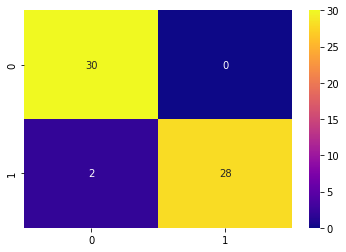

In [33]:
cm = confusion_matrix(y_actual, y_test)
sns.heatmap(cm, cmap='plasma', annot = True, )